In [195]:
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Wczytanie danych

In [197]:
data = pd.read_excel("./data/france_dataset.xlsx")
data.columns

Index(['id', 'HR_min', 'HR_max', 'SBP_min', 'SBP_max', 'DBP_min', 'DBP_max',
       'SAPSII', 'RR', 'GCS', 'date_hospital_admi', 'date_hospital_end',
       'date_ICU_admi', 'date_ICU_end', 'date_death', 'time_smyp_ICUadmi',
       'male', 'ICU_LOS', 'ICU_DC', 'time_hosp_ICU', 'Age', 'Death_D28',
       'Death_D7', 'ddimere_J1', 'ddimere_J2', 'ddimere_J3', 'ddimere_J4',
       'ddimere_J5', 'crp_J1', 'crp_J2', 'crp_J3', 'crp_J4', 'crp_J5',
       'ldh_j1', 'ldh_j2', 'ldh_j3', 'ldh_j4', 'ldh_j5', 'L_pourc_J1',
       'L_pourc_J2', 'L_pourc_J3', 'L_pourc_J4', 'L_pourc_J5'],
      dtype='object')

### Opis kolumn:
- `ICU_LOS`- długość pobytu
- `ICU_DC` - Intensive Cure Unit discharge
- `date_ICU_admi` - date of Intensive Cure Unit admission

In [198]:
data = data[['id','date_hospital_admi', 'date_hospital_end','date_ICU_admi', 'date_ICU_end', 'date_death','ICU_LOS', 'ICU_DC','Age','Death_D28',
       'Death_D7', 'crp_J1', 'crp_J2', 'crp_J3', 'crp_J4', 'crp_J5',
       'ldh_j1', 'ldh_j2', 'ldh_j3', 'ldh_j4', 'ldh_j5', 'L_pourc_J1',
       'L_pourc_J2', 'L_pourc_J3', 'L_pourc_J4', 'L_pourc_J5']]

data = data.replace({".": np.nan})

### Niespójność danych

In [201]:
import plotly.express as px
import plotly.graph_objects as go

data['7_days_after'] = data['date_hospital_admi'] + np.timedelta64(7,'D')
data['28_days_after'] = data['date_hospital_admi'] + np.timedelta64(28,'D')
data['sum'] = data['Death_D28'] + data['Death_D7']
data['sum'] = pd.cut(data['sum'],
                        bins=[0, 0.9, 1.9, 2.5],  labels=['0-7', '7-28', '>28'],
                    include_lowest=True)

fig = px.scatter(data, x='date_hospital_admi', y="date_death", color = 'sum', 
                 labels = {'date_hospital_admi': 'date of hospital admission', "date_death": 'date of death', 
                           'sum': 'days from ICU admission to death'}, 
                 title = 'Number of days between admission to the hospital and death', 
                 category_orders={"sum": ["0-7", "7-28", ">28"]}
                 )
fig.data[0].name
fig.add_trace(
    go.Scatter(
        name = 'day after 7 days',
        x= data['date_hospital_admi'],
        y=data['7_days_after'],
        mode="lines",
        line=go.scatter.Line(color="gray", dash = 'dot'),
        showlegend=True)
)
fig.add_trace(
    go.Scatter(
        name = 'day after 28 days',
        x= data['date_hospital_admi'],
        y=data['28_days_after'],
        mode="lines",
        line=go.scatter.Line(color="gray", dash = 'dash'),
        showlegend=True)
)

fig.update_layout(
    autosize=False,
    width=800,
    plot_bgcolor='rgb(242,242,242)',
    height=600,)



data['sum']
fig.show()


Wykres przedstawia niespójność pomiędzy wartościami w kolumnie `Death_D28` oraz `Death_D7`, a obliczoną różnicą czasu pomiędzy datą przyjęcia do szpitala (`date_hospital_admi`) oraz datą śmierci (`date_death`)

### Zbadanie liczby obserwacji w kolumnie `date_death`

In [21]:
data['Death_D28'].value_counts()

0    117
1     61
Name: Death_D28, dtype: int64

Text(0.5, 1.0, 'Number of observations')

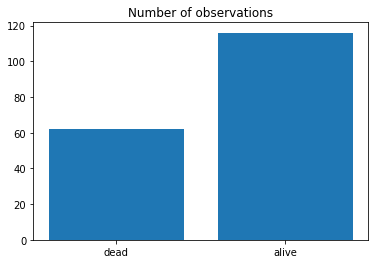

In [23]:
dead = data.date_death.value_counts().sum()
alive = len(data) - dead
plt.bar(['dead', 'alive'],[dead, alive])
plt.title("Number of observations")

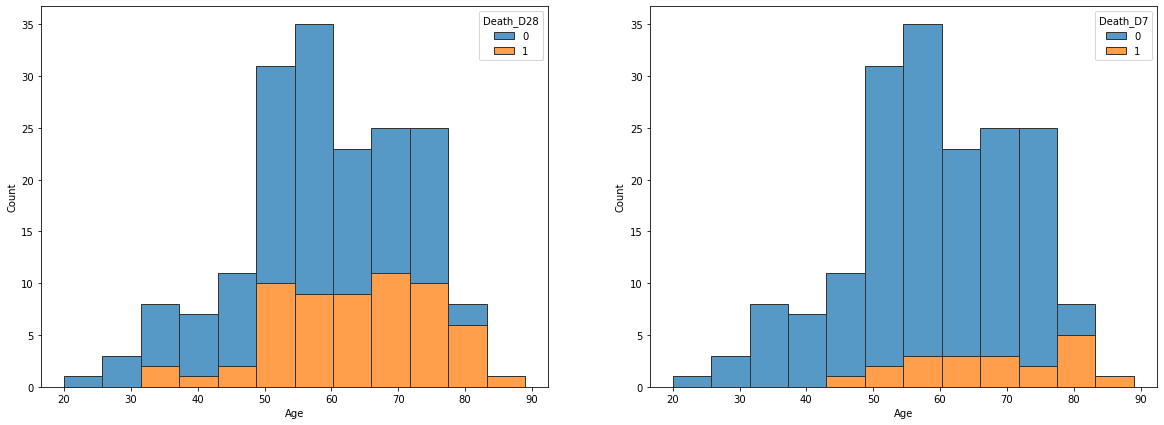

In [202]:
i = 0
j = 0
fig, ax = plt.subplots(1, 2, figsize=(20, 7),  squeeze=False)

sns.histplot(data, x='Age', hue="Death_D28", multiple="stack", edgecolor=".2", ax=ax[0][0])
sns.histplot(data, x='Age', hue="Death_D7", multiple="stack", edgecolor=".2", ax=ax[0][1])

#data['date_death'].loc[data['date_death'] != np.nan]